# Importing Libraries

In [1]:
import os 
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D, MaxPooling2D, BatchNormalization,Dropout, Flatten,Activation,concatenate,Input,AlphaDropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
import random as rn
import cv2                  
from tqdm import tqdm
from random import shuffle  
import itertools
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import backend as K



Using TensorFlow backend.


# Creating Dataset

In [2]:
x=[]
y=[]
size=150
path='../input/flowers/'
for ftype in os.listdir(path):
    for img in tqdm(os.listdir(path+ftype)):
        label=ftype
        path1 = os.path.join(path+ftype,img)
        img = plt.imread(path1)
        img = cv2.resize(img, (size,size))
        x.append(np.array(img))
        y.append(str(label))

100%|██████████| 784/784 [00:04<00:00, 178.13it/s]


In [3]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y=to_categorical(y,5)
x=np.array(x)

# Splitting Data into Training, Testing and Validation Datasets

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=42)

In [5]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

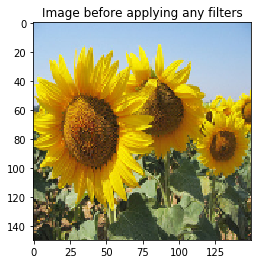

In [6]:
plt.imshow(x_train[1276])
plt.title("Image before applying any filters")
plt.show()

# Applying Sharpning Filter

In [7]:
sharpx_train=[]
sharpx_val=[]
sharpx_test=[]

skernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])

for image in x_train:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_train.append(sharp)

for image in x_val:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_val.append(sharp)

for image in x_test:
    sharp = cv2.filter2D(image, -1, skernel)
    sharpx_test.append(sharp)

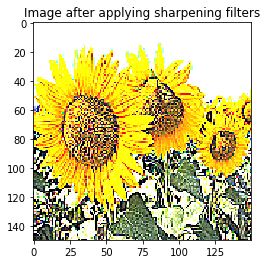

In [8]:
plt.imshow(sharpx_train[1276])
plt.title("Image after applying sharpening filters")
plt.show()

# Applying Gaussians Filter

In [9]:
gaussx_train=[]
gaussx_val=[]
gaussx_test=[]


for image in x_train:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_train.append(gauss_feature)

for image in x_val:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_val.append(gauss_feature)

for image in x_test:
    gauss_feature = cv2.GaussianBlur(image, (3, 33), 0)
    gaussx_test.append(gauss_feature)

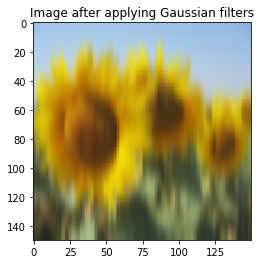

In [10]:
plt.imshow(gaussx_train[1276])
plt.title("Image after applying Gaussian filters")
plt.show()

# Applying Gabor Filter

In [11]:
gaborx_train=[]
gaborx_val=[]
gaborx_test=[]

g_kernel = cv2.getGaborKernel((13, 13), 4.0, 56.2, 10.0, 1, 0, ktype=cv2.CV_32F)

    
for image in x_train:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_train.append(gabor_feature)

for image in x_val:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_val.append(gabor_feature)

for image in x_test:
    gabor_feature = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    gaborx_test.append(gabor_feature)

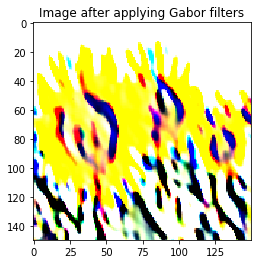

In [12]:
plt.imshow(gaborx_train[1276])
plt.title("Image after applying Gabor filters")
plt.show()

# Image Normalization

In [13]:
sharpx_train=np.array(sharpx_train)/255
sharpx_val=np.array(sharpx_val)/255
sharpx_test=np.array(sharpx_test)/255

gaussx_train=np.array(gaussx_train)/255
gaussx_val=np.array(gaussx_val)/255
gaussx_test=np.array(gaussx_test)/255

gaborx_train=np.array(gaborx_train)/255
gaborx_val=np.array(gaborx_val)/255
gaborx_test=np.array(gaborx_test)/255

# Building a Basic CNN

In [14]:
input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

gabormodel = Model(input1, out)
gabormodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

sharpmodel = Model(input1, out)
sharpmodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
out = Dense(5, activation = "softmax")(x)

gaussmodel = Model(input1, out)
gaussmodel.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=True)  

datagen.fit(gaussx_train,)
datagen.fit(sharpx_train)
datagen.fit(gaborx_train)



# Creating Callback Functions

In [16]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelgaborbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Gabor Features

In [17]:
history = gabormodel.fit_generator(datagen.flow(gaborx_train,y_train, batch_size=128),
                              epochs = 30, 
                              validation_data = (gaborx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/30
24/24 [==============================] - 17s 721ms/step - loss: 0.5030 - acc: 0.7947 - val_loss: 0.4876 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to modelgaborbest.h5
Epoch 2/30
24/24 [==============================] - 13s 561ms/step - loss: 0.4538 - acc: 0.8027 - val_loss: 0.4264 - val_acc: 0.8116

Epoch 00002: val_acc improved from 0.80000 to 0.81156, saving model to modelgaborbest.h5
Epoch 3/30
24/24 [==============================] - 13s 549ms/step - loss: 0.4065 - acc: 0.8088 - val_loss: 0.4090 - val_acc: 0.8260

Epoch 00003: val_acc improved from 0.81156 to 0.82601, saving model to modelgaborbest.h5
Epoch 4/30
24/24 [==============================] - 14s 569ms/step - loss: 0.3831 - acc: 0.8225 - val_loss: 0.3869 - val_acc: 0.8179

Epoch 00004: val_acc did not improve from 0.82601
Epoch 5/30
24/24 [==============================] - 13s 561ms/step - loss: 0.3832 - acc: 0.8232 - val_loss: 0.3573 - val_acc: 0.8324

Epoch 00005: val

# Visualisation of the Model Training  

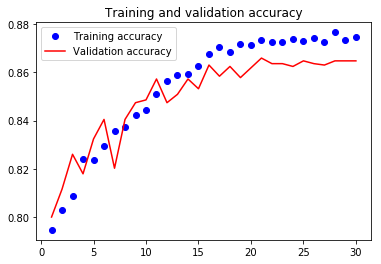

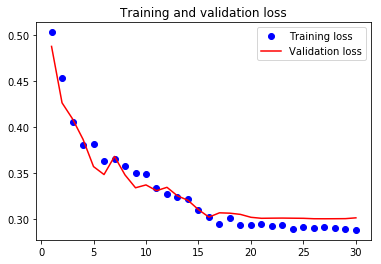

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [19]:
pred=np.argmax(gabormodel.predict(gaborx_test),axis=1)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Greens):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting Confusion Matrix 

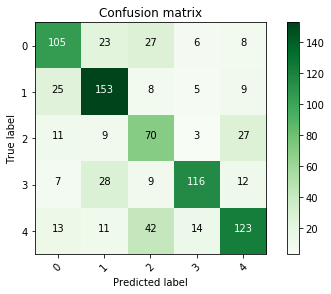

In [21]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [22]:
gabormodel.evaluate(gaborx_test,y_test)

864/864 [==============================] - 1s 821us/step


[0.29122602553279314, 0.8768518478782089]

In [23]:
gabormodel.save('gabor_model.h5')

In [24]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelgaussbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Gaussian Features

In [25]:
history = gaussmodel.fit_generator(datagen.flow(gaussx_train,y_train, batch_size=128),
                              epochs = 30, 
                              validation_data = (gaussx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/30
24/24 [==============================] - 14s 589ms/step - loss: 0.4738 - acc: 0.7986 - val_loss: 0.4148 - val_acc: 0.8156

Epoch 00001: val_acc improved from -inf to 0.81561, saving model to modelgaussbest.h5
Epoch 2/30
24/24 [==============================] - 13s 541ms/step - loss: 0.4251 - acc: 0.8050 - val_loss: 0.3967 - val_acc: 0.8052

Epoch 00002: val_acc did not improve from 0.81561
Epoch 3/30
24/24 [==============================] - 14s 586ms/step - loss: 0.4046 - acc: 0.8136 - val_loss: 0.3595 - val_acc: 0.8358

Epoch 00003: val_acc improved from 0.81561 to 0.83584, saving model to modelgaussbest.h5
Epoch 4/30
24/24 [==============================] - 13s 548ms/step - loss: 0.3828 - acc: 0.8240 - val_loss: 0.3474 - val_acc: 0.8370

Epoch 00004: val_acc improved from 0.83584 to 0.83699, saving model to modelgaussbest.h5
Epoch 5/30
24/24 [==============================] - 14s 571ms/step - loss: 0.3736 - acc: 0.8277 - val_loss: 0.3385 - val_acc: 0.8451

Epoch 00005: val

# Visualisation of the Model Training

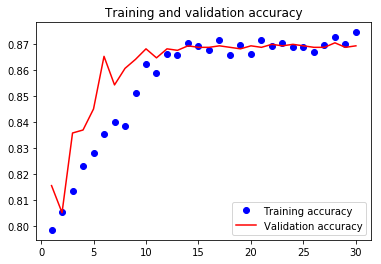

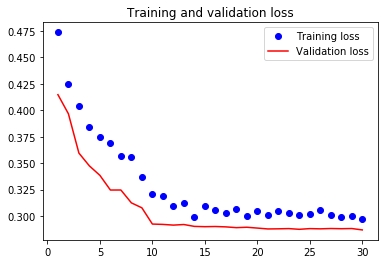

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
pred=np.argmax(gaussmodel.predict(gaussx_test),axis=1)

# Plotting Confusion Matrix

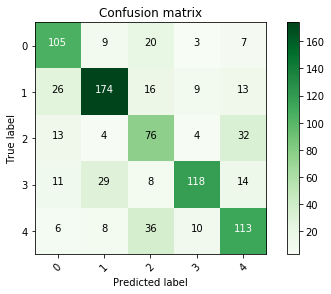

In [28]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [29]:
gaussmodel.evaluate(gaussx_test,y_test)

864/864 [==============================] - 1s 634us/step


[0.29345652405862455, 0.8775462927641692]

In [30]:
gaussmodel.save('gauss_model.h5')

In [31]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelsharpbest.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the model using Sharp Features

In [32]:
history = sharpmodel.fit_generator(datagen.flow(sharpx_train,y_train, batch_size=128),
                              epochs = 30, 
                              validation_data = (sharpx_val,y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/30
24/24 [==============================] - 15s 629ms/step - loss: 0.5167 - acc: 0.7954 - val_loss: 0.4817 - val_acc: 0.7983

Epoch 00001: val_acc improved from -inf to 0.79827, saving model to modelsharpbest.h5
Epoch 2/30
24/24 [==============================] - 13s 560ms/step - loss: 0.4510 - acc: 0.7993 - val_loss: 0.4301 - val_acc: 0.7942

Epoch 00002: val_acc did not improve from 0.79827
Epoch 3/30
24/24 [==============================] - 14s 579ms/step - loss: 0.4167 - acc: 0.8087 - val_loss: 0.4674 - val_acc: 0.8162

Epoch 00003: val_acc improved from 0.79827 to 0.81618, saving model to modelsharpbest.h5
Epoch 4/30
24/24 [==============================] - 14s 589ms/step - loss: 0.4034 - acc: 0.8140 - val_loss: 0.3893 - val_acc: 0.8249

Epoch 00004: val_acc improved from 0.81618 to 0.82486, saving model to modelsharpbest.h5
Epoch 5/30
24/24 [==============================] - 14s 571ms/step - loss: 0.3723 - acc: 0.8343 - val_loss: 0.4571 - val_acc: 0.8098

Epoch 00005: val

# Visualisation of the Model Training

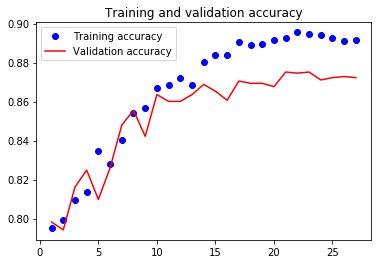

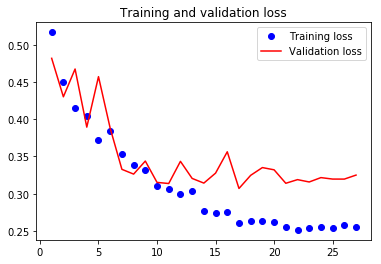

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
pred=np.argmax(sharpmodel.predict(sharpx_test),axis=1)

# Plotting Confusion Matrix

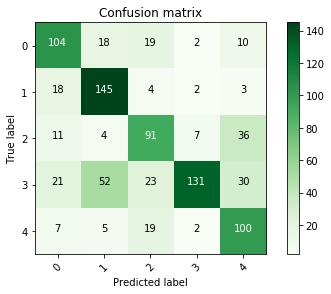

In [35]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [36]:
sharpmodel.evaluate(sharpx_test,y_test)

864/864 [==============================] - 1s 640us/step


[0.31123041058028184, 0.8729166697572779]

In [37]:
sharpmodel.save('sharp_model.h5')

# Creating a Merged CNN

In [38]:
input1 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input1)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'selu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = AlphaDropout(0.3,seed = 2019)(x)
out1 = Flatten()(x)


input2 = Input(shape=(size, size, 3))
x = Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(input2)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = Conv2D(filters = 96, kernel_size = 3, padding = 'same', activation = 'selu')(x)
x = MaxPooling2D((2, 2),strides=(2,2))(x)
x = AlphaDropout(0.3,seed = 2019)(x)
out2 = Flatten()(x)


concatenated = concatenate([out1, out2])

x = Dense(1024)(concatenated)
x = Activation('sigmoid')(x)
x = Dense(512)(concatenated)
x = Activation('sigmoid')(x)
out = Dense(5, activation = "softmax")(x)




model2 = Model([input1,input2], out)
model2.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)

In [40]:
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.1, min_lr = 0.00001)
checkpoint = ModelCheckpoint('model2best.h5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 4, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

# Training the Merged CNN Model Using Both Gabor and Gaussian Features

In [41]:
history = model2.fit_generator(datagen.flow([gaussx_train, gaborx_train],y_train, batch_size=128),
                              epochs = 30, 
                              validation_data = ([gaussx_val, gaborx_val],y_val),
                              callbacks=callbacks,
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/30
24/24 [==============================] - 19s 807ms/step - loss: 0.6124 - acc: 0.7530 - val_loss: 0.4382 - val_acc: 0.8064

Epoch 00001: val_acc improved from -inf to 0.80636, saving model to model2best.h5
Epoch 2/30
24/24 [==============================] - 17s 699ms/step - loss: 0.6017 - acc: 0.7628 - val_loss: 0.4546 - val_acc: 0.7873

Epoch 00002: val_acc did not improve from 0.80636
Epoch 3/30
24/24 [==============================] - 16s 684ms/step - loss: 0.4501 - acc: 0.7973 - val_loss: 0.4112 - val_acc: 0.8081

Epoch 00003: val_acc improved from 0.80636 to 0.80809, saving model to model2best.h5
Epoch 4/30
24/24 [==============================] - 17s 708ms/step - loss: 0.4056 - acc: 0.8086 - val_loss: 0.3828 - val_acc: 0.8168

Epoch 00004: val_acc improved from 0.80809 to 0.81676, saving model to model2best.h5
Epoch 5/30
24/24 [==============================] - 16s 679ms/step - loss: 0.3845 - acc: 0.8211 - val_loss: 0.3631 - val_acc: 0.8324

Epoch 00005: val_acc improve

# Visualisation of the Model Training for Merged Convolutional Neural Network

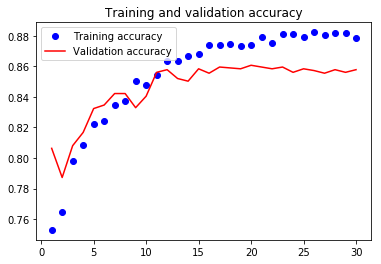

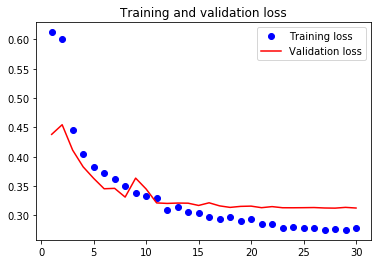

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
pred=np.argmax(model2.predict([gaussx_test,gaborx_test]),axis=1)

# Plotting Confusion Matrix for Merged Model

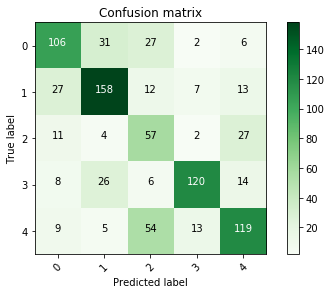

In [44]:
confusion_mtx = confusion_matrix(pred, np.argmax(y_test,axis=1))
plot_confusion_matrix(confusion_mtx, classes = range(5))

# Evaluating the model using Testing Data

In [45]:
model2.evaluate([gaussx_test,gaborx_test],y_test)

864/864 [==============================] - 1s 1ms/step


[0.3080136317897726, 0.8699074144716616]

In [46]:
model2.save('merged_model.h5')